In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [34]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

### Pre-processing

In [35]:
df.drop('Serial No.', axis = 1, inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
s_cols=[]
for i in df.columns:
    x=i.strip()
    s_cols.append(x)
df.columns = s_cols

In [37]:
df.shape

(500, 8)

In [38]:
df.isnull().sum() # checking for null values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [39]:
# Summary statistics
df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# EDA

### Univariate Analysis

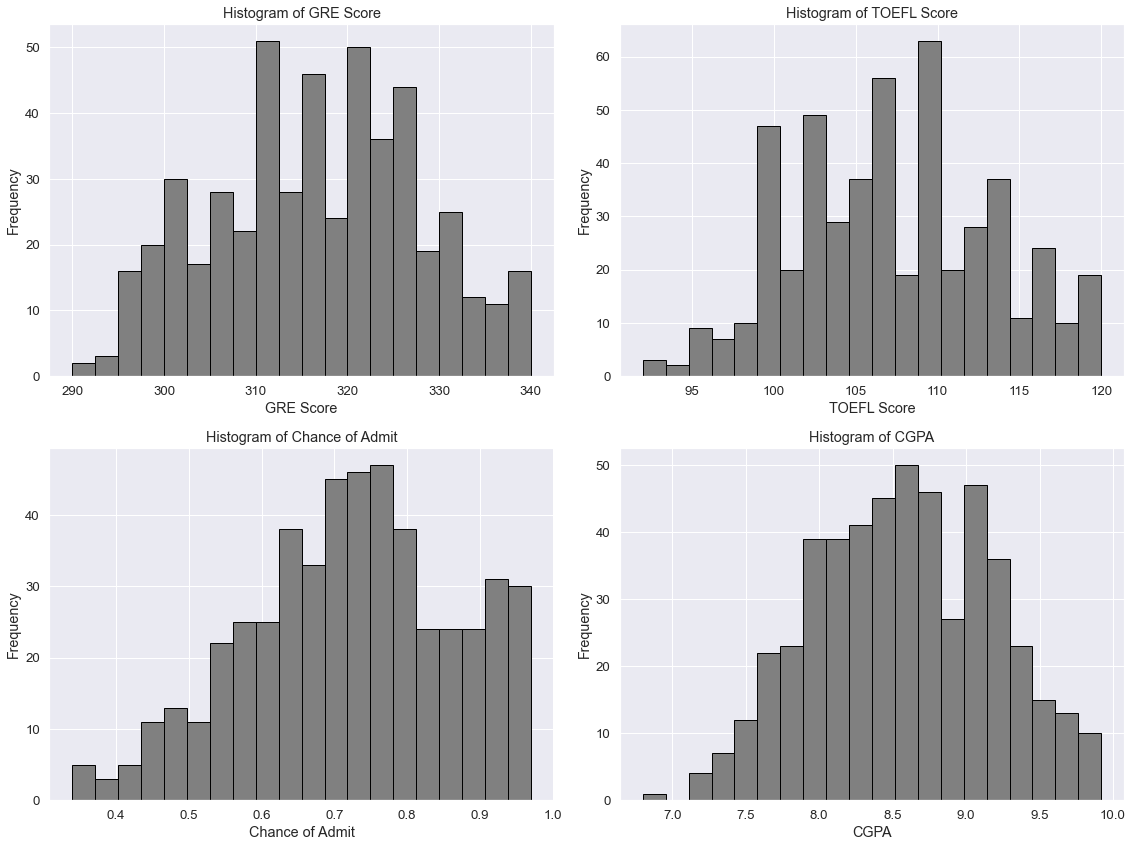

In [40]:
# Univariate EDA for numerical variables
numerical_columns = ['GRE Score', 'TOEFL Score', 'Chance of Admit', 'CGPA']

# Create subplots for histograms
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot histograms for each numerical variable
for i, column in enumerate(numerical_columns):
    axs[i].hist(df[column], bins=20, edgecolor='black', color='grey')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

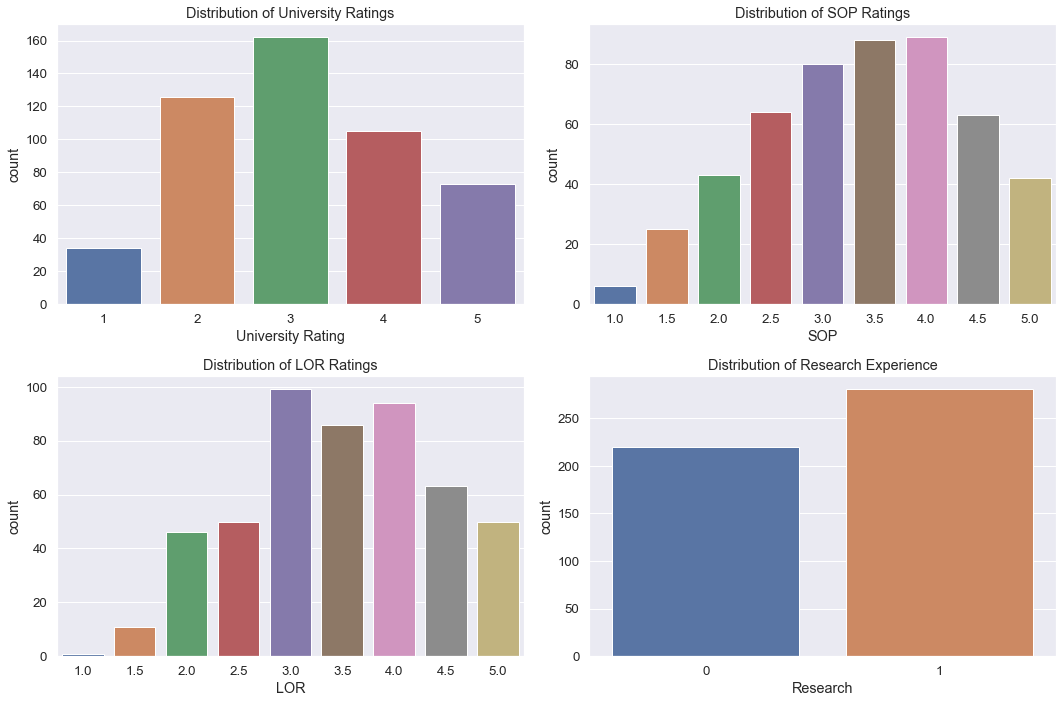

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Bar plot for University Rating
sns.countplot(x='University Rating', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of University Ratings')

# Bar plot for SOP
sns.countplot(x='SOP', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of SOP Ratings')

# Bar plot for LOR
sns.countplot(x='LOR', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of LOR Ratings')

# Bar plot for Research
sns.countplot(x='Research', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Research Experience')

plt.tight_layout()
plt.show()

## Bivariate Analysis

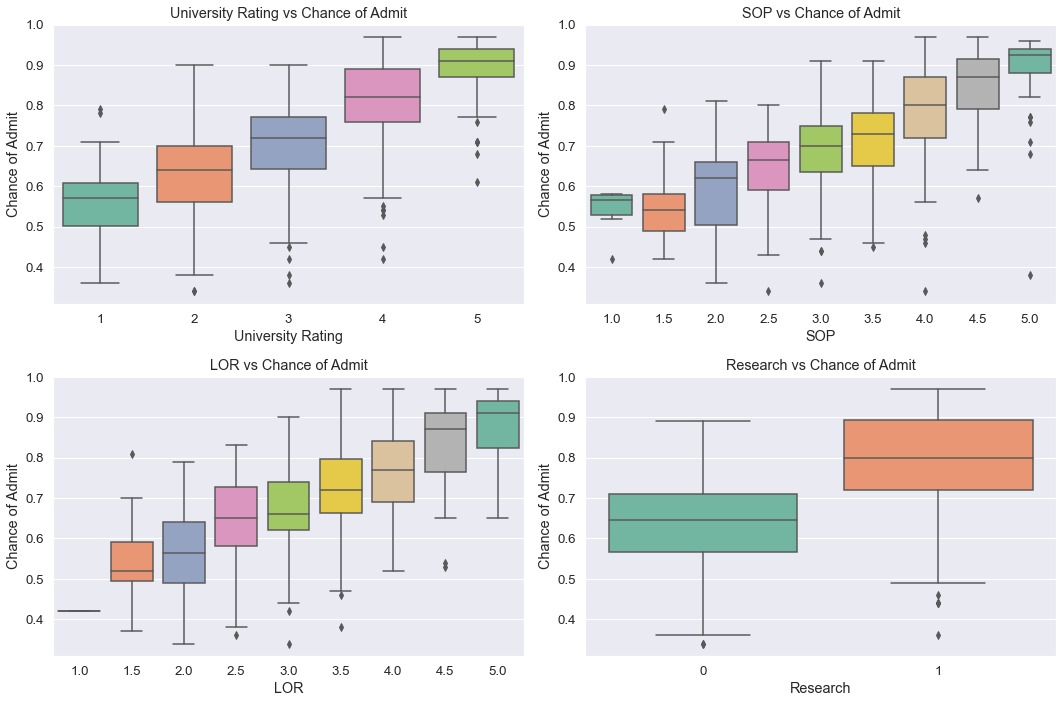

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot for University Rating
sns.boxplot(x='University Rating', y='Chance of Admit', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('University Rating vs Chance of Admit')

# Boxplot for SOP
sns.boxplot(x='SOP', y='Chance of Admit', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('SOP vs Chance of Admit')

# Boxplot for LOR
sns.boxplot(x='LOR', y='Chance of Admit', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('LOR vs Chance of Admit')

# Boxplot for Research
sns.boxplot(x='Research', y='Chance of Admit', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Research vs Chance of Admit')

plt.tight_layout()
plt.show()


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

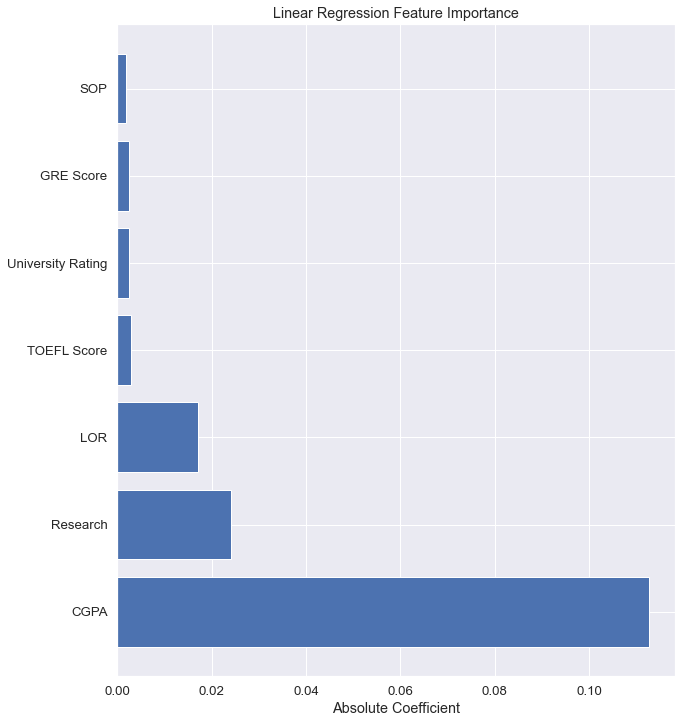

In [44]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

### Target Encoding for Categorical  Variables

In [45]:
# Calculate the mean of the target variable for each category
t_df = df.copy()
means = t_df.groupby('University Rating')['Chance of Admit'].mean()
t_df['University Rating'] = t_df['University Rating'].map(means)

t_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,0.801619,4.5,4.5,9.65,1,0.92
1,324,107,0.801619,4.0,4.5,8.87,1,0.76
2,316,104,0.702901,3.0,3.5,8.00,1,0.72
3,322,110,0.702901,3.5,2.5,8.67,1,0.80
4,314,103,0.626111,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,0.888082,4.5,4.0,9.02,1,0.87
496,337,117,0.888082,5.0,5.0,9.87,1,0.96
497,330,120,0.888082,4.5,5.0,9.56,1,0.93
498,312,103,0.801619,4.0,5.0,8.43,0,0.73


In [46]:
means = t_df.groupby('SOP')['Chance of Admit'].mean()
t_df['SOP'] = t_df['SOP'].map(means)

means = t_df.groupby('LOR')['Chance of Admit'].mean()
t_df['LOR'] = t_df['LOR'].map(means)

means = t_df.groupby('Research')['Chance of Admit'].mean()
t_df['Research'] = t_df['Research'].map(means)

df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


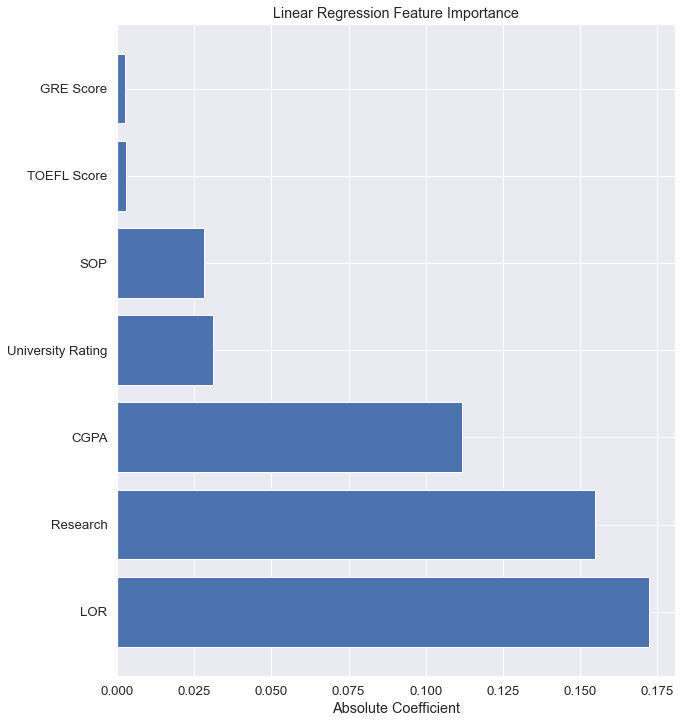

In [47]:
X = t_df.drop('Chance of Admit', axis=1)
y = t_df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_t_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_t_df['Absolute Coefficient'] = np.abs(feature_importance_t_df['Coefficient'])
feature_importance_t_df = feature_importance_t_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_t_df['Feature'], feature_importance_t_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

### Lets see after feature scaling


In [48]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to scale
columns_to_scale = df.columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply min-max scaling to the selected columns
m_df = df.copy()  # Creating a copy to avoid modifying the original DataFrame
m_df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now m_df contains the scaled values


In [49]:
m_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.619048


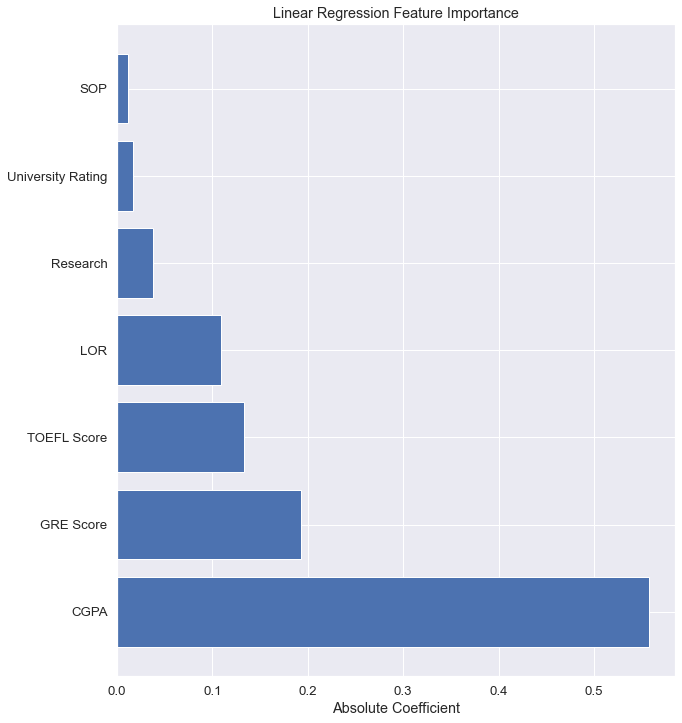

In [50]:
X = m_df.drop('Chance of Admit', axis=1)
y = m_df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_m_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_m_df['Absolute Coefficient'] = np.abs(feature_importance_m_df['Coefficient'])
feature_importance_m_df = feature_importance_m_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_m_df['Feature'], feature_importance_m_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

<Axes: >

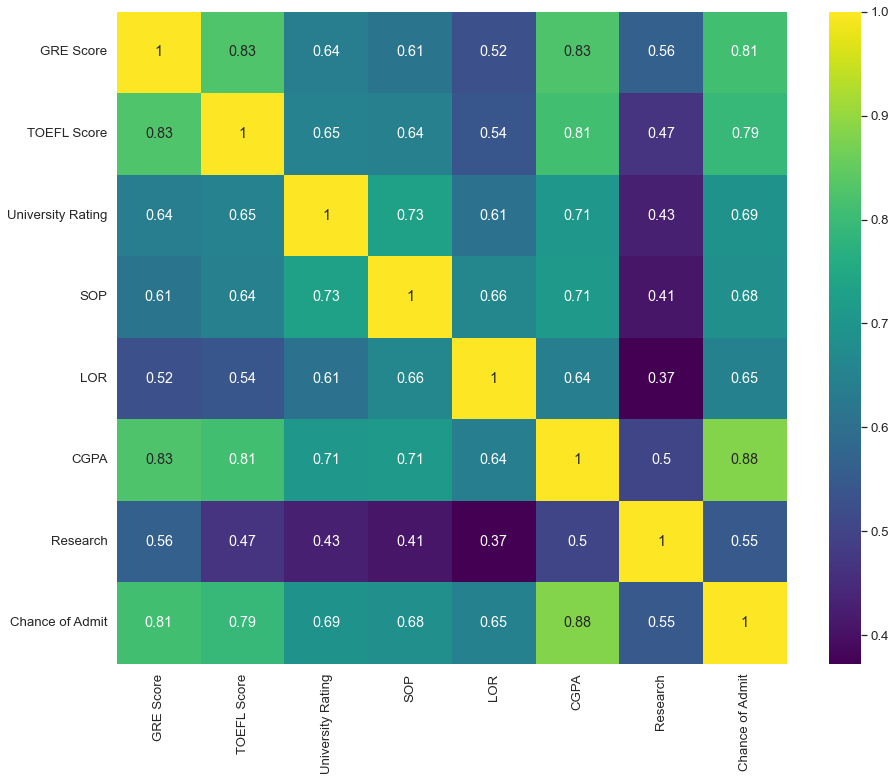

In [51]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15, 12))
sns.heatmap(m_df.corr(), cmap="viridis", annot=True)

In [55]:
import statsmodels.api as sm

In [56]:
X = m_df.drop('Chance of Admit', axis=1)  # Independent variables
y = m_df['Chance of Admit']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          8.21e-180
Time:                        22:14:39   Log-Likelihood:                 470.37
No. Observations:                 500   AIC:                            -924.7
Df Residuals:                     492   BIC:                            -891.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0130      0.014      0.902      0.367      -0.015       0.041
GRE Score             0.1475      0.040      3.700      0.000       0.069       0.226
TOEFL Score           0.1235      0.039      3.184      0.002       0.047       0.200
University Rating     0.0377      0.024      1.563      0.119      -0.010       0.085
SOP                   0.0101      0.029      0.348      0.728      -0.047       0.067
LOR                   0.1070      0.026      4.074      0.000       0.055       0.159
CGPA                  0.5863      0.048     12.198      0.000       0.492       0.681
Research              0.0386      0.010      3.680      0.000       0.018       0.059
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ridge Regression

In [57]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [59]:
X = m_df.drop('Chance of Admit', axis=1)  # Independent variables
y = m_df['Chance of Admit']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [60]:

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')


Mean Squared Error (Ridge): 0.009471258558650435


### Lasso Regression

In [61]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # the alpha parameter
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

In [62]:
# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso}')


Mean Squared Error (Lasso): 0.051897784391534404


## Testing the assumptions of the linear regression model


##### VIF Check


In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming m_df is your DataFrame with the dependent variable and features
X = m_df.drop('Chance of Admit', axis=1)  # Independent variables

# Function to calculate VIF for each variable
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data



In [76]:
calculate_vif(X)

,Variable,VIF
0,GRE Score,29.024693
1,TOEFL Score,28.124993
2,University Rating,11.101366
3,SOP,19.007718
4,LOR,15.048490
5,CGPA,41.461741
6,Research,3.344455


In [81]:
X = X.drop('GRE Score', axis=1)
sns.barplot(calculate_vif(X), x='Variable', y='VIF')

,Variable,VIF
0,TOEFL Score,22.177590
1,University Rating,11.069116
2,SOP,18.985608
3,LOR,14.988097
4,CGPA,34.436901
5,Research,3.062561


<Axes: xlabel='Variable', ylabel='VIF'>

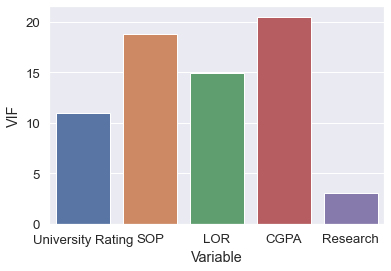

In [85]:
X = X.drop('TOEFL Score', axis=1)
sns.barplot(calculate_vif(X), x='Variable', y='VIF')

<Axes: xlabel='Variable', ylabel='VIF'>

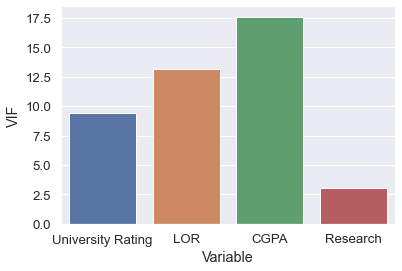

In [86]:
X = X.drop('SOP', axis=1)
sns.barplot(calculate_vif(X), x='Variable', y='VIF')

<Axes: xlabel='Variable', ylabel='VIF'>

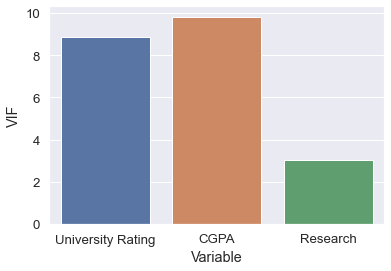

In [87]:
X = X.drop('LOR', axis=1)
sns.barplot(calculate_vif(X), x='Variable', y='VIF')

<Axes: xlabel='Variable', ylabel='VIF'>

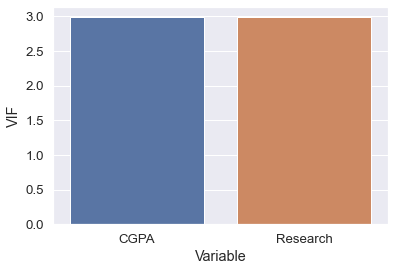

In [88]:
X = X.drop('University Rating', axis=1)
sns.barplot(calculate_vif(X), x='Variable', y='VIF')

In [68]:
# Get residuals
residuals = model.resid

# Check if the mean of residuals is nearly zero
mean_residuals = residuals.mean()

# Set a threshold for what you consider "nearly zero"
threshold = 1e-10

if abs(mean_residuals) < threshold:
    print("Mean of residuals is nearly zero.")
else:
    print("Mean of residuals is not nearly zero.")

Mean of residuals is nearly zero.
